In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline


In [2]:
df=pd.read_csv('data_perm_take_home.csv',encoding = 'ISO-8859-1')

In [3]:
df.head().T

,0,1,2,3,4
case_number,A-06191-36805,A-07194-56311,A-07194-56513,A-07194-56514,A-07197-57029
case_received_date,12/22/14,12/19/14,12/17/14,10/9/14,10/6/14
decision_date,6/19/15,6/19/15,6/19/15,3/3/15,3/3/15
case_status,Certified,Denied,Certified,Certified,Certified
employer_name,BRENTWOOD BIOMEDICAL RESEARCH INSTITUTE,WASHINGTON STATE UNIVERSITY,WASHINGTON STATE UNIVERSITY,WASHINGTON STATE UNIVERSITY,WASHINGTON STATE UNIVERSITY
employer_num_employees,149,5600,5600,5600,5600
employer_yr_established,1988,1890,1890,1890,1890
job_education,Bachelor's,Doctorate,Doctorate,Doctorate,Doctorate
job_experience_num_months,NaN,NaN,NaN,84,NaN
job_state,CALIFORNIA,WASHINGTON,WASHINGTON,WASHINGTON,WASHINGTON


1. Which employer has the most entries in the dataset?
2. Which employer has the most “Certified-Expired” cases?
3. How many unique employers contain the character string "APPLE" that is not "APPLE INC."?
4. Write a function that plots a histogram with 50 bins of the duration between from case_received_date to decision_date for any given employeer_name. Use the function to plot for "APPLE INC." and "GOOGLE INC."

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61613 entries, 0 to 61612
Data columns (total 15 columns):
case_number                  61613 non-null object
case_received_date           61611 non-null object
decision_date                61613 non-null object
case_status                  61613 non-null object
employer_name                61611 non-null object
employer_num_employees       61593 non-null float64
employer_yr_established      61577 non-null float64
job_education                61609 non-null object
job_experience_num_months    33996 non-null float64
job_state                    61602 non-null object
job_foreign_lang_req         61611 non-null object
job_level                    57066 non-null float64
employee_citizenship         61604 non-null object
wage_offer                   61598 non-null float64
wage_unit                    60951 non-null object
dtypes: float64(5), object(10)
memory usage: 7.1+ MB


In [5]:
df['employer_name'].value_counts().head(5)

COGNIZANT TECHNOLOGY SOLUTIONS US CORPORATION    5441
INTEL CORPORATION                                1611
CISCO SYSTEMS, INC.                              1028
GOOGLE INC.                                       914
QUALCOMM TECHNOLOGIES INC.                        862
Name: employer_name, dtype: int64

In [6]:
df.loc[df['case_status']=='Certified-Expired']['employer_name'].value_counts().head(5)

MICROSOFT CORPORATION         521
CISCO SYSTEMS, INC.           398
QUALCOMM TECHNOLOGIES INC.    269
GOOGLE INC.                   253
AMAZON CORPORATE LLC          231
Name: employer_name, dtype: int64

In [7]:
Employer_Name = pd.DataFrame(data = df.loc[df['employer_name']!='APPLE INC.']
                             ['employer_name'].unique(), columns = ['employer_name'])

In [8]:
(Employer_Name['employer_name'].str.lower().str.contains('apple')).sum()

7

In [9]:
df.loc[df['wage_unit'] == 'Hour','annual_wage' ] = df['wage_offer'] * 2080

In [10]:
df.loc[df['wage_unit'] == 'Year', 'annual_wage'] = df['wage_offer']

In [11]:
df.loc[df['wage_unit'] == 'Week', 'annual_wage'] = df['wage_offer'] * 52

In [12]:
df.loc[df['wage_unit'] == 'Month', 'annual_wage'] = df['wage_offer'] * 12

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61613 entries, 0 to 61612
Data columns (total 16 columns):
case_number                  61613 non-null object
case_received_date           61611 non-null object
decision_date                61613 non-null object
case_status                  61613 non-null object
employer_name                61611 non-null object
employer_num_employees       61593 non-null float64
employer_yr_established      61577 non-null float64
job_education                61609 non-null object
job_experience_num_months    33996 non-null float64
job_state                    61602 non-null object
job_foreign_lang_req         61611 non-null object
job_level                    57066 non-null float64
employee_citizenship         61604 non-null object
wage_offer                   61598 non-null float64
wage_unit                    60951 non-null object
annual_wage                  60950 non-null float64
dtypes: float64(6), object(10)
memory usage: 7.5+ MB


In [14]:
df['annual_wage'].describe()

count    6.095000e+04
mean     9.504681e+04
std      4.289658e+05
min      5.200000e+01
25%      7.246700e+04
50%      9.000000e+04
75%      1.100000e+05
max      1.051315e+08
Name: annual_wage, dtype: float64

/Users/chaoma/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


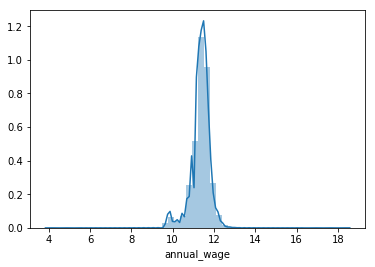

In [15]:
sns.distplot(np.log(df['annual_wage'].dropna()))

In [16]:
df['annual_wage'].sort_values(ascending = False)

47436    105131520.0
46         9072960.0
31         3003520.0
15283      1145000.0
49105       938000.0
17963       889502.0
32953       746323.0
33670       700000.0
5286        681410.0
57830       642000.0
49243       622500.0
24905       600000.0
38490       597460.0
33111       550000.0
38181       550000.0
17089       535000.0
32808       526000.0
32387       526000.0
16518       525000.0
40354       500000.0
19212       500000.0
29635       500000.0
21016       500000.0
659         500000.0
23027       500000.0
52320       500000.0
29234       480000.0
44121       475008.0
16223       462000.0
39499       450000.0
            ...     
61010            NaN
61013            NaN
61027            NaN
61074            NaN
61075            NaN
61144            NaN
61189            NaN
61204            NaN
61218            NaN
61242            NaN
61315            NaN
61319            NaN
61336            NaN
61344            NaN
61370            NaN
61380            NaN
61415        

In [17]:
df = df.drop([47436, 46, 31, 15283])

In [18]:
Percentile = np.nanpercentile(df['annual_wage'],[0,25,50,75,100])
IQR = Percentile[3] - Percentile[1]
UpLimit = Percentile[3] + IQR*2
DownLimit = Percentile[1] - IQR*1.5

In [19]:
UpLimit

185066.0

In [20]:
DownLimit

16167.5

In [21]:
df_mode = df.copy()

In [22]:
col = ['employer_num_employees', 'employer_yr_established', 'job_education', 'job_experience_num_months', 'job_state', 'job_foreign_lang_req','job_level','employee_citizenship','wage_unit', 'annual_wage']
for i in col:
    df_mode[i].fillna(df_mode[i].mode()[0], inplace = True)

In [23]:
df_mode.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61609 entries, 0 to 61612
Data columns (total 16 columns):
case_number                  61609 non-null object
case_received_date           61607 non-null object
decision_date                61609 non-null object
case_status                  61609 non-null object
employer_name                61607 non-null object
employer_num_employees       61609 non-null float64
employer_yr_established      61609 non-null float64
job_education                61609 non-null object
job_experience_num_months    61609 non-null float64
job_state                    61609 non-null object
job_foreign_lang_req         61609 non-null object
job_level                    61609 non-null float64
employee_citizenship         61609 non-null object
wage_offer                   61594 non-null float64
wage_unit                    61609 non-null object
annual_wage                  61609 non-null float64
dtypes: float64(6), object(10)
memory usage: 8.0+ MB


In [24]:
df_certified = df_mode.loc[df_mode['case_status'] == 'Certified'].copy()

In [25]:
df_certified.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37928 entries, 0 to 61612
Data columns (total 16 columns):
case_number                  37928 non-null object
case_received_date           37928 non-null object
decision_date                37928 non-null object
case_status                  37928 non-null object
employer_name                37928 non-null object
employer_num_employees       37928 non-null float64
employer_yr_established      37928 non-null float64
job_education                37928 non-null object
job_experience_num_months    37928 non-null float64
job_state                    37928 non-null object
job_foreign_lang_req         37928 non-null object
job_level                    37928 non-null float64
employee_citizenship         37928 non-null object
wage_offer                   37928 non-null float64
wage_unit                    37928 non-null object
annual_wage                  37928 non-null float64
dtypes: float64(6), object(10)
memory usage: 4.9+ MB


In [26]:
df_certified.drop(columns = ['wage_offer', 'case_status'], inplace = True)

Part 2: Data Modeling

For certified cases (case_status = “Certified”), build a model that predicts wage_offered by using 5 features with the most predictive power. Some considerations:

• How does the response variable look? How do the predictors look?
• How might missing values be handled?
• What transformations are relevant?
• Are there any outliers?
• What additional features could be engineered?
• What features are most predictive of wage_offered?
• Which model is picked? What advantages does the model offer against an alternative?
• What do the errors/residuals and their distributions tell us?
• How well do you think this model will extrapolate to the entire U.S. population?
• What are ways to improve this model?

Also known as independent variables, covariates or predictors. A categorical feature can be counted as 1 feature. For example, X1 is a categorical variable with 3 categories A, B and C. X1_A, X1_B and X1_C can be counted as 1 feature, not 3 features.

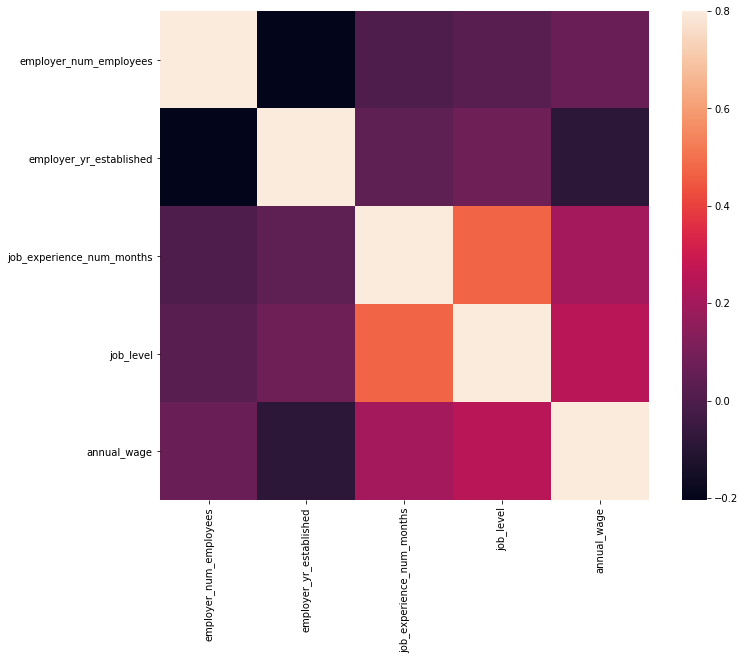

In [27]:
corrmat = df_certified.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [28]:
corrmat

,employer_num_employees,employer_yr_established,job_experience_num_months,job_level,annual_wage
employer_num_employees,1.000000,-0.204701,0.000057,0.027659,0.068397
employer_yr_established,-0.204701,1.000000,0.041653,0.074021,-0.083107
job_experience_num_months,0.000057,0.041653,1.000000,0.474198,0.203532
job_level,0.027659,0.074021,0.474198,1.000000,0.253624
annual_wage,0.068397,-0.083107,0.203532,0.253624,1.000000


In [29]:
corrmat.index

Index(['employer_num_employees', 'employer_yr_established',
       'job_experience_num_months', 'job_level', 'annual_wage'],
      dtype='object')

In [30]:
cm

NameError: name 'cm' is not defined

In [ ]:
k = 5 #number of variables for heatmap
cols = corrmat.index
cm = np.corrcoef(df_certified[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

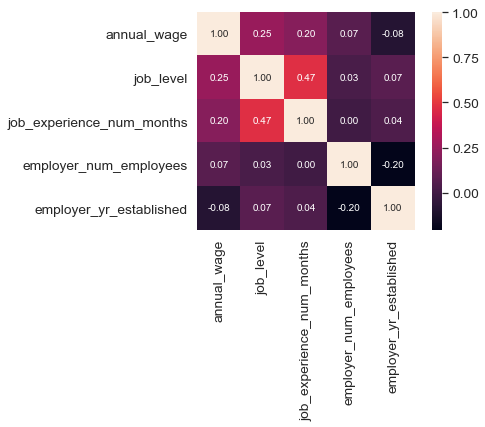

In [31]:
k = 8 #number of variables for heatmap
cols = corrmat.nlargest(k, 'annual_wage')['annual_wage'].index
cm = np.corrcoef(df_certified[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

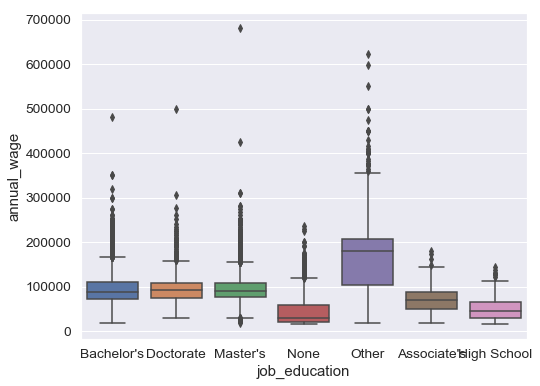

In [32]:
var = 'job_education'
data = pd.concat([df_certified['annual_wage'], df_certified[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="annual_wage", data=data)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text xticklabel objects>)

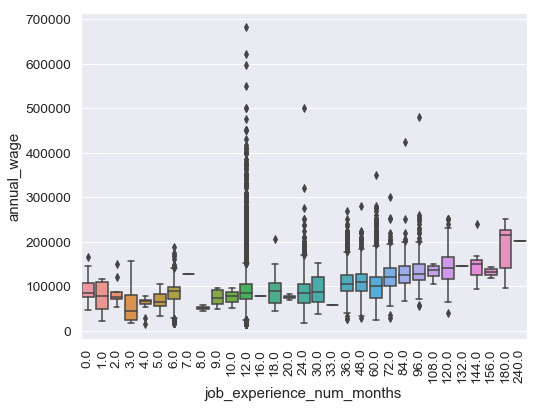

In [33]:
var = 'job_experience_num_months'
data = pd.concat([df_certified['annual_wage'], df_certified[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="annual_wage", data=data)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55]), <a list of 56 Text xticklabel objects>)

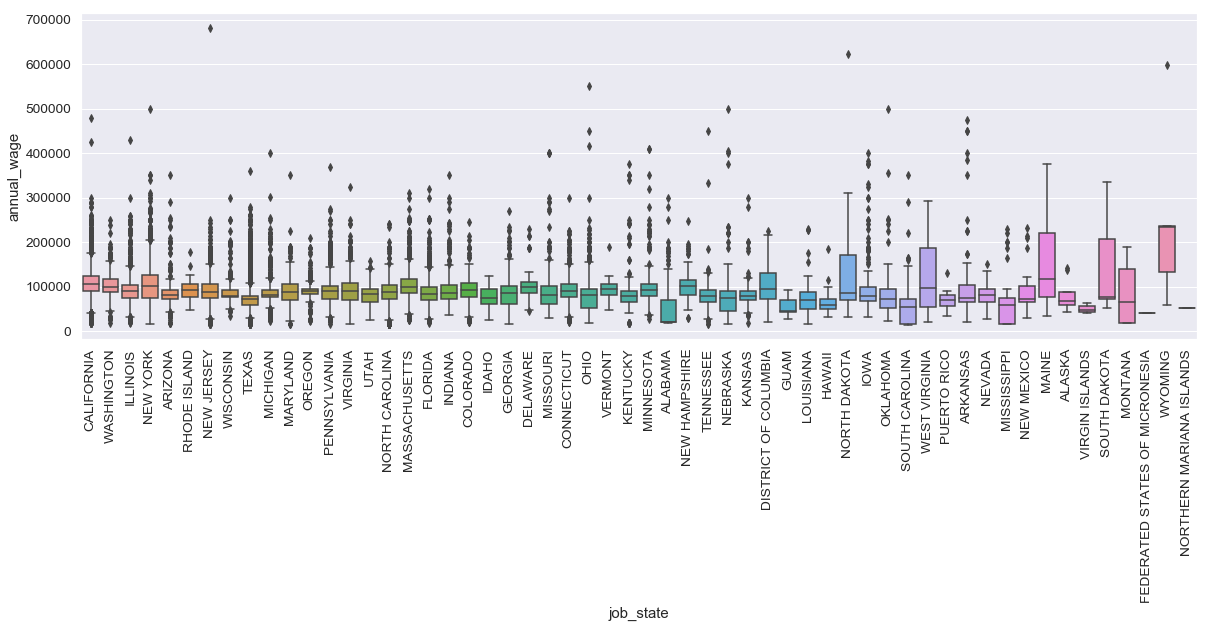

In [34]:
var = 'job_state'
data = pd.concat([df_certified['annual_wage'], df_certified[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 6))
fig = sns.boxplot(x=var, y="annual_wage", data=data)
plt.xticks(rotation=90)

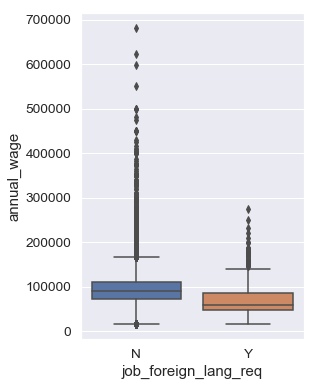

In [35]:
var = 'job_foreign_lang_req'
data = pd.concat([df_certified['annual_wage'], df_certified[var]], axis=1)
f, ax = plt.subplots(figsize=(4, 6))
fig = sns.boxplot(x=var, y="annual_wage", data=data)

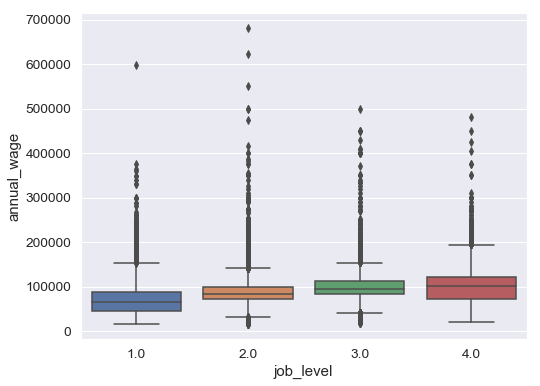

In [36]:
var = 'job_level'
data = pd.concat([df_certified['annual_wage'], df_certified[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="annual_wage", data=data)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163]),
 <a list of 164 Text xticklabel objects>)

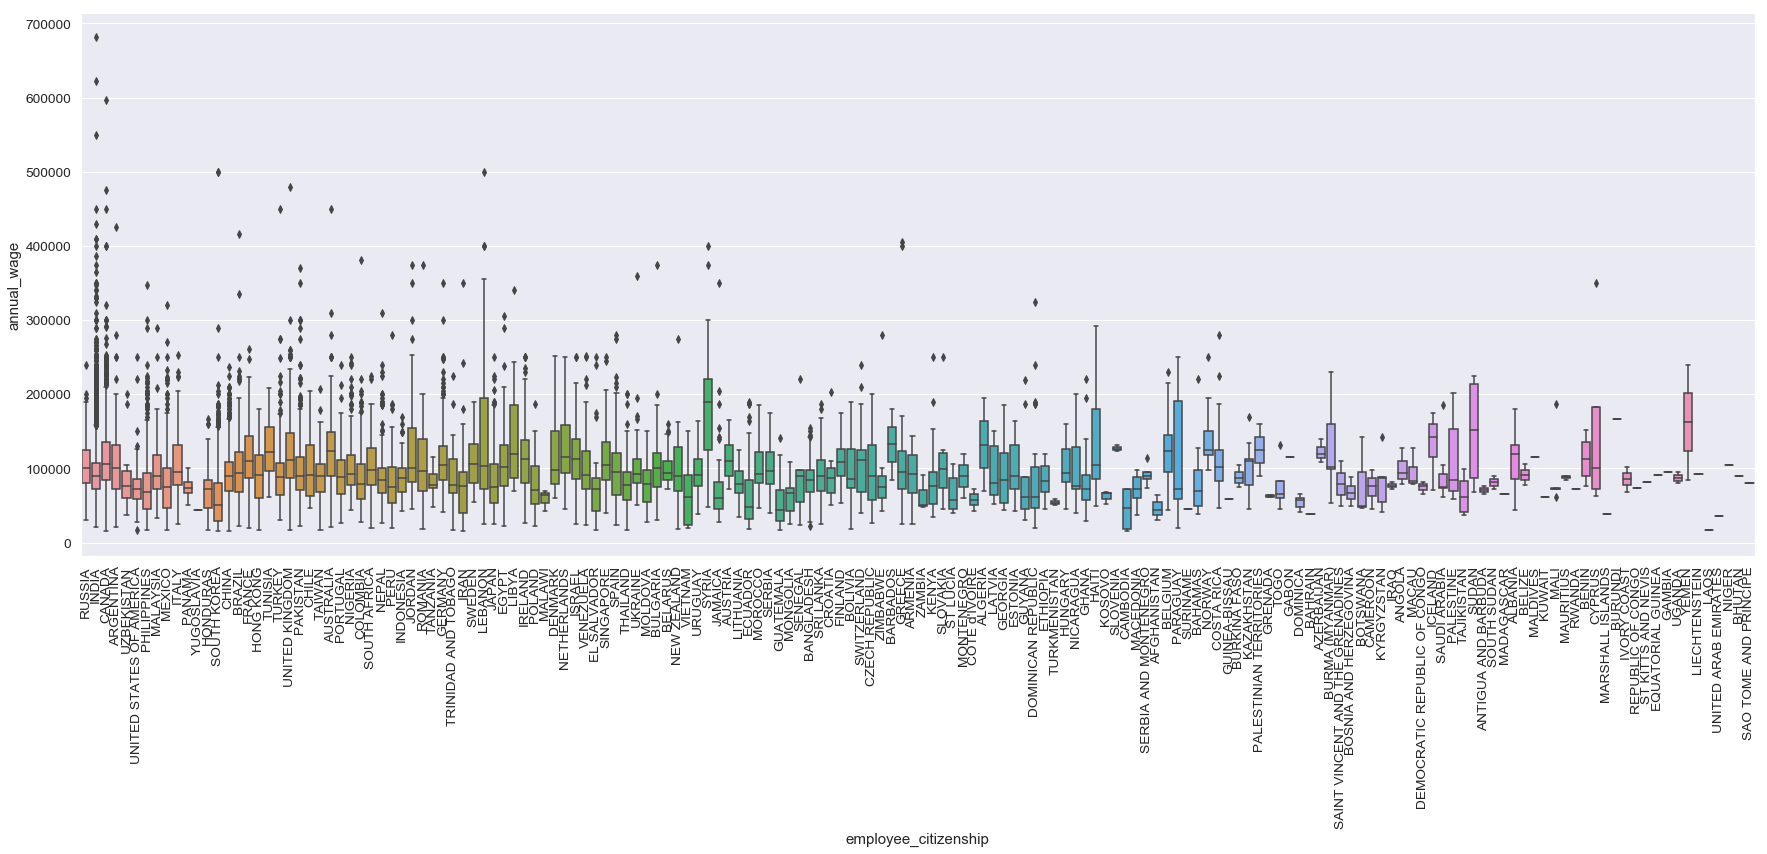

In [37]:
var = 'employee_citizenship'
data = pd.concat([df_certified['annual_wage'], df_certified[var]], axis=1)
f, ax = plt.subplots(figsize=(30, 10))
fig = sns.boxplot(x=var, y="annual_wage", data=data)
plt.xticks(rotation=90)

In [38]:
def get_year(x):
    return x.split('/')[-1]

In [39]:
df_certified['application_year']= df_certified['case_received_date'].apply(get_year)

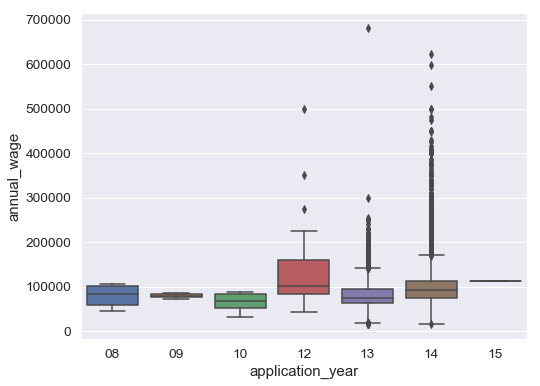

In [40]:
var = 'application_year'
data = pd.concat([df_certified['annual_wage'], df_certified[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="annual_wage", data=data)

In [41]:
df_certified['employer_age'] = (2019 - df_certified['employer_yr_established'])

In [42]:
df_certified.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37928 entries, 0 to 61612
Data columns (total 16 columns):
case_number                  37928 non-null object
case_received_date           37928 non-null object
decision_date                37928 non-null object
employer_name                37928 non-null object
employer_num_employees       37928 non-null float64
employer_yr_established      37928 non-null float64
job_education                37928 non-null object
job_experience_num_months    37928 non-null float64
job_state                    37928 non-null object
job_foreign_lang_req         37928 non-null object
job_level                    37928 non-null float64
employee_citizenship         37928 non-null object
wage_unit                    37928 non-null object
annual_wage                  37928 non-null float64
application_year             37928 non-null object
employer_age                 37928 non-null float64
dtypes: float64(6), object(10)
memory usage: 6.2+ MB


In [43]:
col1 = ['employer_name','employer_num_employees','job_education', 'job_experience_num_months','job_state','job_foreign_lang_req','job_level','employee_citizenship']

for i in col1:
    df_certified[i + '_avg'] = df_certified.groupby(i)['annual_wage'].transform('mean')

In [44]:
df_certified.head().T

,0,2,3,4,5
case_number,A-06191-36805,A-07194-56513,A-07194-56514,A-07197-57029,A-07206-60089
case_received_date,12/22/14,12/17/14,10/9/14,10/6/14,8/18/14
decision_date,6/19/15,6/19/15,3/3/15,3/3/15,1/2/15
employer_name,BRENTWOOD BIOMEDICAL RESEARCH INSTITUTE,WASHINGTON STATE UNIVERSITY,WASHINGTON STATE UNIVERSITY,WASHINGTON STATE UNIVERSITY,WASHINGTON STATE UNIVERSITY
employer_num_employees,149,5600,5600,5600,5600
employer_yr_established,1988,1890,1890,1890,1890
job_education,Bachelor's,Doctorate,Doctorate,Doctorate,Doctorate
job_experience_num_months,12,12,84,12,12
job_state,CALIFORNIA,WASHINGTON,WASHINGTON,WASHINGTON,WASHINGTON
job_foreign_lang_req,N,N,N,N,N


In [45]:
#df_certified['employer_avg'] = df_certified.groupby('employer_name')['annual_wage'].transform('mean')

In [46]:
#df_certified['employer_num_employees_avg'] = df_certified.groupby('employer_num_employees')['annual_wage'].transform('mean')

In [47]:
#df_certified['job_education_avg'] = df_certified.groupby('job_education')['annual_wage'].transform('mean')

In [48]:
#df_certified['experience_avg'] = df_certified.groupby('job_experience_num_months')['annual_wage'].transform('mean')

In [49]:
#df_certified['job_state_avg'] = df_certified.groupby('job_state')['annual_wage'].transform('mean')

In [50]:
#df_certified['foreign_lang_avg'] = df_certified.groupby('job_state')['annual_wage'].transform('mean')

In [51]:
#from sklearn.preprocessing import MinMaxScaler

In [52]:
#df_certified = pd.get_dummies(df_certified)

In [53]:
df_certified['job_education'] = df_certified['job_education'].map({'None':0,'High School':1, "Associate's": 2,"Bachelor's" : 3,"Master's" : 4, "Doctorate" : 5, "Other" : 6}).astype(int)

In [54]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_certified['job_state'] = le.fit_transform(df_certified['job_state'])

In [55]:
df_certified.loc[df_certified['wage_unit'] == 'Year','wage_unit'] = 0
df_certified.loc[df_certified['wage_unit'] == 'Hour','wage_unit'] = 1
df_certified.loc[df_certified['wage_unit'] == 'Week','wage_unit'] = 2
df_certified.loc[df_certified['wage_unit'] == 'Month','wage_unit'] = 3

In [56]:
df_certified['employee_citizenship'] = le.fit_transform(df_certified['employee_citizenship'])

In [57]:
df_certified.drop(columns = ['case_number','case_received_date','decision_date','employer_name'], inplace = True)

In [58]:
df_certified.loc[df_certified['job_foreign_lang_req'] == 'N','job_foreign_lang_req'] = 0
df_certified.loc[df_certified['job_foreign_lang_req'] == 'Y','job_foreign_lang_req'] = 1

In [59]:
df_certified['annual_wage'] = np.log(df_certified['annual_wage'])

In [60]:
from scipy.stats import norm
from scipy import stats

/Users/chaoma/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


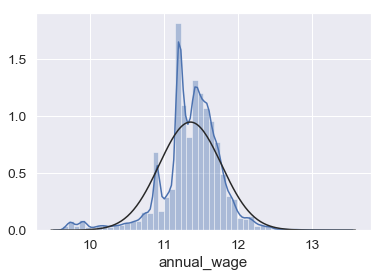

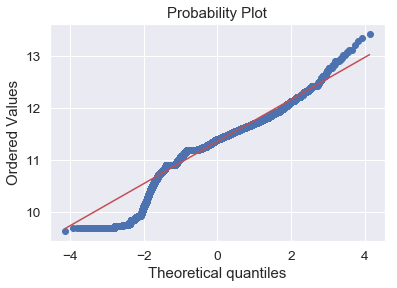

In [61]:
sns.distplot(df_certified['annual_wage'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_certified['annual_wage'], plot=plt)

In [76]:
X = df_certified.drop('annual_wage', axis =1)

In [77]:
y = df_certified['annual_wage']

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [79]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [80]:
predictions = lm.predict(X_test)

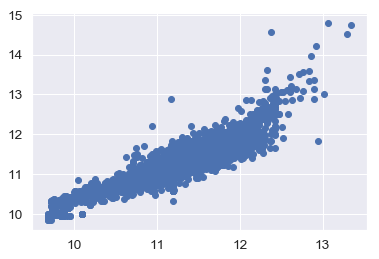

In [81]:
plt.scatter(y_test,predictions)

In [83]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(np.exp(y_test), np.exp(predictions)))
print('MSE:', metrics.mean_squared_error(np.exp(y_test), np.exp(predictions)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(np.exp(y_test), np.exp(predictions))))

MAE: 11897.598067391895
MSE: 1840392219.8896956
RMSE: 42899.792772106666


In [84]:
lm.score(X_test, y_test)

0.8360690873735714

In [85]:
from sklearn.ensemble import RandomForestRegressor

In [86]:
rfr = RandomForestRegressor(n_estimators = 500)

In [87]:
rfr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [88]:
predictions_tree = rfr.predict(X_test)

In [89]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(np.exp(y_test), np.exp(predictions_tree)))
print('MSE:', metrics.mean_squared_error(np.exp(y_test), np.exp(predictions_tree)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(np.exp(y_test), np.exp(predictions_tree))))

MAE: 7233.704545409459
MSE: 216472254.0654224
RMSE: 14712.99609411429


In [90]:
rfr.score(X_test, y_test)

0.9147481797062819